In [7]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt
import btseg.transformers as t

In [6]:
transforms = t.Compose([
        t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
        t.RegionSelection(region=1),
        t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
        t.CannyEdge(threshold_1=50, threshold_2=100),
        t.Dilate(kernel=None, iterations=1),
        t.Erode(kernel=None, iterations=1)
])

In [9]:
def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

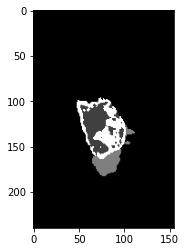

In [8]:
image = cv2.imread('../data/Outdir/BraTS20_Training_097/87.png')
plt.imshow(image)

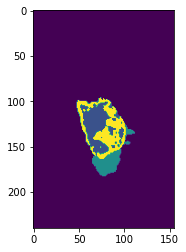

In [55]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

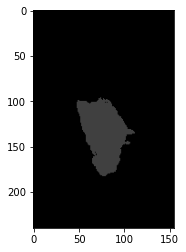

In [56]:
gray = np.where(image > 0, 64, image)
plt.imshow(gray)

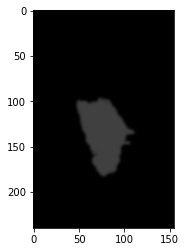

In [57]:
gray = cv2.GaussianBlur(gray, (7, 7), 0)
plt.imshow(gray)

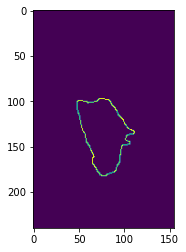

In [58]:
edged = cv2.Canny(gray, 50, 100)
plt.imshow(edged)

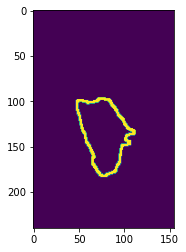

In [59]:
edged = cv2.dilate(edged, None, iterations=1)
plt.imshow(edged)

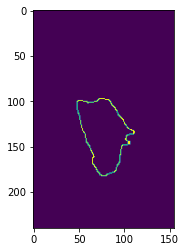

In [60]:
edged = cv2.erode(edged, None, iterations=1)
plt.imshow(edged)

In [67]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

In [89]:
# loop over the contours individually
for c in cnts[:1]:
    # if the contour is not sufficiently large, ignore it
    if cv2.contourArea(c) < 100:
        continue
    # compute the rotated bounding box of the contour
    orig = image.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
    # loop over the original points and draw them
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
        
    # unpack the ordered bounding box, then compute the midpoint
    # between the top-left and top-right coordinates, followed by
    # the midpoint between bottom-left and bottom-right coordinates
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    # compute the midpoint between the top-left and top-right points,
    # followed by the midpoint between the top-righ and bottom-right
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)
    # draw the midpoints on the image
    cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
    # draw lines between the midpoints
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)), (255, 0, 255), 2)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)), (255, 0, 255), 2)
    
    # compute the Euclidean distance between the midpoints
    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
    # if the pixels per metric has not been initialized, then
    # compute it as the ratio of pixels to supplied metric
    # (in this case, inches)
#     print(dA)
#     print(dB)
    print(dA * dB)
    # draw the object sizes on the image
    cv2.putText(orig, "{:.1f}".format(dA), (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
    cv2.putText(orig, "{:.1f}".format(dB), (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
    # show the output image
#     cv2.imshow("Image", orig)
#     cv2.waitKey(0)

4820.3734295176755


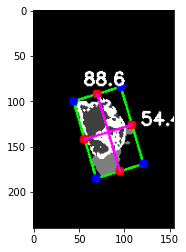

In [88]:
plt.imshow(orig)

In [3]:
import glob

In [4]:
files = glob.glob('../data/Outdir/BraTS20_Training_094/*.png')
len(files)

155

In [5]:
def calculate_area(path):
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.where(image > 0, 64, image)
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
    edged = cv2.Canny(gray, 50, 100)
    edged = cv2.dilate(edged, None, iterations=1)
    edged = cv2.erode(edged, None, iterations=1)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    areas = []
    
    # loop over the contours individually
    for c in cnts:
        # if the contour is not sufficiently large, ignore it
        if cv2.contourArea(c) < 100:
            continue
        # compute the rotated bounding box of the contour
        orig = image.copy()
        box = cv2.minAreaRect(c)
        box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
        box = np.array(box, dtype="int")
        # order the points in the contour such that they appear
        # in top-left, top-right, bottom-right, and bottom-left
        # order, then draw the outline of the rotated bounding
        # box
        box = perspective.order_points(box)
        cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
        # loop over the original points and draw them
        for (x, y) in box:
            cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

        # unpack the ordered bounding box, then compute the midpoint
        # between the top-left and top-right coordinates, followed by
        # the midpoint between bottom-left and bottom-right coordinates
        (tl, tr, br, bl) = box
        (tltrX, tltrY) = midpoint(tl, tr)
        (blbrX, blbrY) = midpoint(bl, br)
        # compute the midpoint between the top-left and top-right points,
        # followed by the midpoint between the top-righ and bottom-right
        (tlblX, tlblY) = midpoint(tl, bl)
        (trbrX, trbrY) = midpoint(tr, br)
        # draw the midpoints on the image
        cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
        cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
        cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
        cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
        # draw lines between the midpoints
        cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)), (255, 0, 255), 2)
        cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)), (255, 0, 255), 2)

        # compute the Euclidean distance between the midpoints
        dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
        dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
        # if the pixels per metric has not been initialized, then
        # compute it as the ratio of pixels to supplied metric
        # (in this case, inches)
    #     print(dA)
    #     print(dB)
        areas.append(dA * dB)
        # draw the object sizes on the image
#         cv2.putText(orig, "{:.1f}".format(dA), (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
#         cv2.putText(orig, "{:.1f}".format(dB), (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (255, 255, 255), 2)
        # show the output image
    #     cv2.imshow("Image", orig)
    #     cv2.waitKey(0)
    return max(areas) if len(areas) > 0 else 0

In [10]:
for f in files:
    area = calculate_area(f)
    print(area, f)

0 ../data/Outdir/BraTS20_Training_094\0.png
0 ../data/Outdir/BraTS20_Training_094\1.png
0 ../data/Outdir/BraTS20_Training_094\10.png
0 ../data/Outdir/BraTS20_Training_094\100.png
0 ../data/Outdir/BraTS20_Training_094\101.png
0 ../data/Outdir/BraTS20_Training_094\102.png
0 ../data/Outdir/BraTS20_Training_094\103.png
0 ../data/Outdir/BraTS20_Training_094\104.png
0 ../data/Outdir/BraTS20_Training_094\105.png
0 ../data/Outdir/BraTS20_Training_094\106.png
0 ../data/Outdir/BraTS20_Training_094\107.png
0 ../data/Outdir/BraTS20_Training_094\108.png
0 ../data/Outdir/BraTS20_Training_094\109.png
0 ../data/Outdir/BraTS20_Training_094\11.png
0 ../data/Outdir/BraTS20_Training_094\110.png
0 ../data/Outdir/BraTS20_Training_094\111.png
0 ../data/Outdir/BraTS20_Training_094\112.png
0 ../data/Outdir/BraTS20_Training_094\113.png
0 ../data/Outdir/BraTS20_Training_094\114.png
0 ../data/Outdir/BraTS20_Training_094\115.png
0 ../data/Outdir/BraTS20_Training_094\116.png
0 ../data/Outdir/BraTS20_Training_094\11

In [97]:
files

['../data/Outdir/BraTS20_Training_097\\0.png',
 '../data/Outdir/BraTS20_Training_097\\1.png',
 '../data/Outdir/BraTS20_Training_097\\10.png',
 '../data/Outdir/BraTS20_Training_097\\100.png',
 '../data/Outdir/BraTS20_Training_097\\101.png',
 '../data/Outdir/BraTS20_Training_097\\102.png',
 '../data/Outdir/BraTS20_Training_097\\103.png',
 '../data/Outdir/BraTS20_Training_097\\104.png',
 '../data/Outdir/BraTS20_Training_097\\105.png',
 '../data/Outdir/BraTS20_Training_097\\106.png',
 '../data/Outdir/BraTS20_Training_097\\107.png',
 '../data/Outdir/BraTS20_Training_097\\108.png',
 '../data/Outdir/BraTS20_Training_097\\109.png',
 '../data/Outdir/BraTS20_Training_097\\11.png',
 '../data/Outdir/BraTS20_Training_097\\110.png',
 '../data/Outdir/BraTS20_Training_097\\111.png',
 '../data/Outdir/BraTS20_Training_097\\112.png',
 '../data/Outdir/BraTS20_Training_097\\113.png',
 '../data/Outdir/BraTS20_Training_097\\114.png',
 '../data/Outdir/BraTS20_Training_097\\115.png',
 '../data/Outdir/BraTS20_T

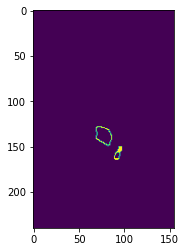

In [7]:
image = cv2.imread('../data/Outdir/BraTS20_Training_097/104.png')
t_image = transforms(image)
plt.imshow(t_image)

In [10]:
cnts = cv2.findContours(t_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts

[array([[[ 94, 150]],
 
        [[ 94, 152]],
 
        [[ 93, 153]],
 
        [[ 93, 154]],
 
        [[ 90, 157]],
 
        [[ 90, 159]],
 
        [[ 89, 160]],
 
        [[ 89, 163]],
 
        [[ 90, 164]],
 
        [[ 93, 164]],
 
        [[ 94, 163]],
 
        [[ 94, 161]],
 
        [[ 95, 160]],
 
        [[ 95, 156]],
 
        [[ 97, 154]],
 
        [[ 97, 150]]], dtype=int32),
 array([[[ 70, 128]],
 
        [[ 69, 129]],
 
        [[ 69, 133]],
 
        [[ 70, 134]],
 
        [[ 70, 137]],
 
        [[ 69, 138]],
 
        [[ 69, 141]],
 
        [[ 70, 142]],
 
        [[ 71, 142]],
 
        [[ 73, 144]],
 
        [[ 74, 144]],
 
        [[ 75, 145]],
 
        [[ 76, 145]],
 
        [[ 78, 147]],
 
        [[ 79, 147]],
 
        [[ 80, 148]],
 
        [[ 81, 148]],
 
        [[ 82, 149]],
 
        [[ 83, 148]],
 
        [[ 84, 148]],
 
        [[ 84, 145]],
 
        [[ 85, 144]],
 
        [[ 85, 143]],
 
        [[ 86, 142]],
 
        [[ 86, 137]],
 
   

In [2]:
from btseg.slices import selecting_slice
path = '../data/Outdir/BraTS20_Training_010/'
selecting_slice(path)

'../data/Outdir/BraTS20_Training_010\\77.png'